<a href="https://colab.research.google.com/github/Tbharvesh/MachineLearningModels/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# Unsupervised->since no label was given in the dataset

In [ ]:
df = pd.read_csv("Mall_Customers.xls")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [ ]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df1= df.drop(['Spending Score (1-100)'],axis=1)
df2=df.drop(['CustomerID','Gender','Age','Annual Income (k$)'],axis=1)
df1
df2

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40
...,...
195,79
196,28
197,74
198,18


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1,df2,test_size=0.2)

In [ ]:
y_test.head()

,Spending Score (1-100)
111,54
128,11
15,79
65,59
91,41


<ipython-input-20-673aa69aba40>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=2)


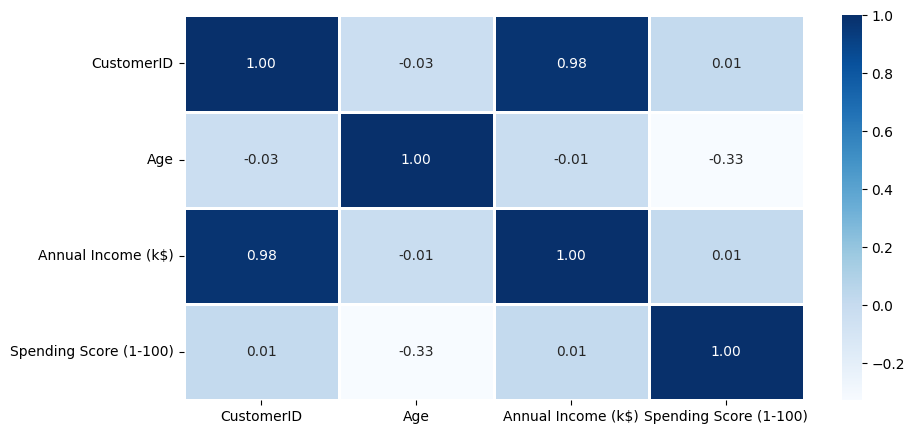

In [ ]:
plt.figure(figsize=(10,5))
corr_target= df.drop("Spending Score (1-100)", axis=1)
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=2)
plt.show()

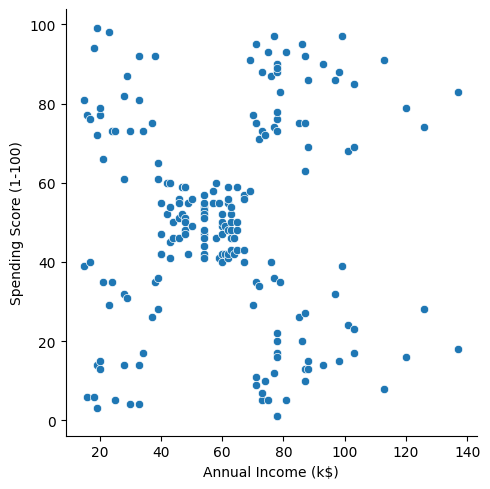

In [ ]:
sns.relplot( x="Annual Income (k$)", y="Spending Score (1-100)",
data=df)

In [ ]:
X=df.drop(['Age','CustomerID','Gender'],axis=1)
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


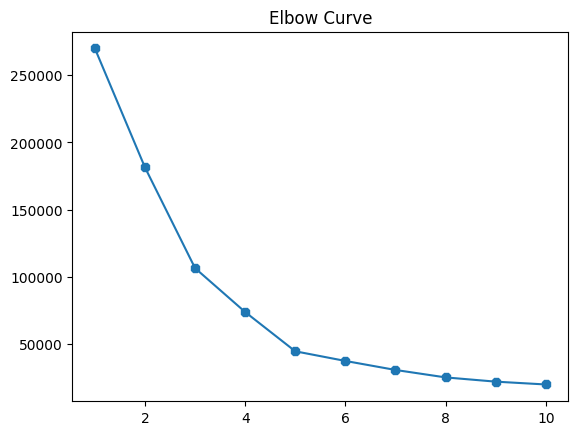

In [ ]:
from sklearn.cluster import KMeans
wcss=[] #within clusters Sum of squared distances of samples to their closest cluster center,
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10) # Number of times the k-means algorithm is run with different centroid seeds.
    kmeans.fit(X)
    # inertia finds the sum of squares of data points n the cluster
    wcss.append(kmeans.inertia_) #seggregate the datapoints intoclusters
plt.plot(range(1,11),wcss,marker="8")  #the sum of sqaures of all points in a particular cluster
plt.title('Elbow Curve')
plt.show()

# Elbow point - where the graph strt to flatten ->it inticares the number of clusters we should make

In [ ]:
kmeans=KMeans(n_clusters=5,n_init=10)
# For k=5 , making model to learn+predict the value
label=kmeans.fit_predict(X)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
# To print the centroid of clusters
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


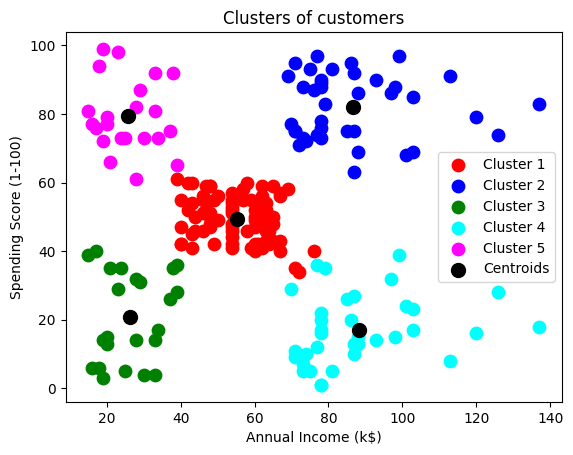

In [ ]:
import matplotlib.pyplot as plt
# Assuming X is a DataFrame and label is a Series
plt.scatter(X.loc[label == 0, 'Annual Income (k$)'], X.loc[label == 0,
'Spending Score (1-100)'],
s=80, c='red', label='Cluster 1')
plt.scatter(X.loc[label == 1, 'Annual Income (k$)'], X.loc[label == 1,
'Spending Score (1-100)'], s=80, c='blue', label='Cluster 2')
plt.scatter(X.loc[label == 2, 'Annual Income (k$)'], X.loc[label == 2,
'Spending Score (1-100)'], s=80, c='green', label='Cluster 3')
plt.scatter(X.loc[label == 3, 'Annual Income (k$)'], X.loc[label == 3,
'Spending Score (1-100)'], s=80, c='cyan', label='Cluster 4')
plt.scatter(X.loc[label == 4, 'Annual Income (k$)'], X.loc[label == 4,
'Spending Score (1-100)'], s=80, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,
1], s=100,
c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
X=df.drop(['Gender','CustomerID'],axis=1)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


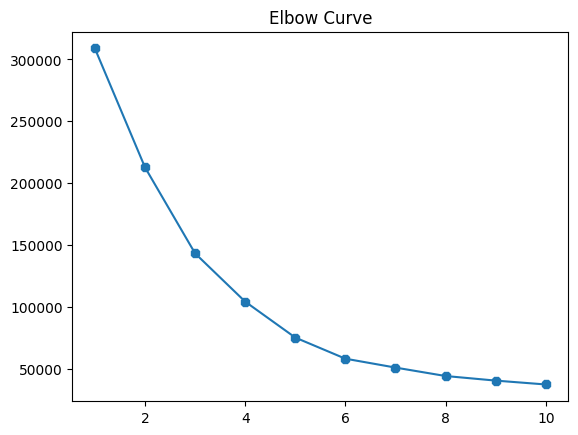

In [ ]:
from sklearn.cluster import KMeans
wcss=[] #within clusters sum of squares distance between each point and sum of clusters
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10) # init smartly initialize the centers
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #seggregate the datapoints into clusters
plt.plot(range(1,11),wcss,marker="8")
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=6,n_init=10)
# For k=5 , making model to learn+predict the value
label=kmeans.fit_predict(X)
print(label)


[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 3 2 3 1 0 2 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 4 1 4 5 4 5 4 5 4 1 4 5 4 5 4 5 4 5 4 1 4 5 4 5 4
 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4]


In [ ]:
print(kmeans.cluster_centers_)

[[44.14285714 25.14285714 19.52380952]
 [27.         56.65789474 49.13157895]
 [25.27272727 25.72727273 79.36363636]
 [56.15555556 53.37777778 49.08888889]
 [32.69230769 86.53846154 82.12820513]
 [41.68571429 88.22857143 17.28571429]]


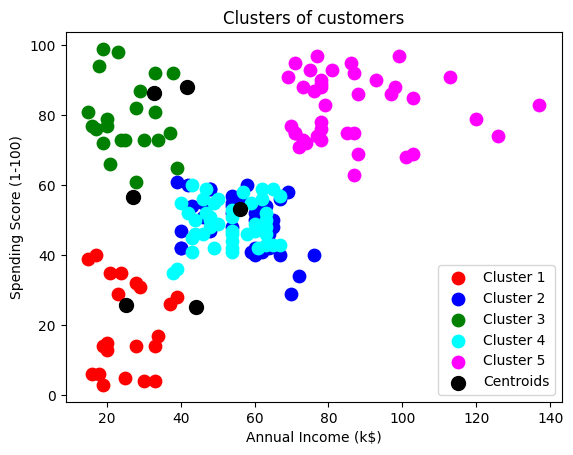

In [ ]:
# Assuming X is a DataFrame and label is a Series
plt.scatter(X.loc[label == 0, 'Annual Income (k$)'], X.loc[label == 0,
'Spending Score (1-100)'], s=80, c='red', label='Cluster 1')
plt.scatter(X.loc[label == 1, 'Annual Income (k$)'], X.loc[label == 1,
'Spending Score (1-100)'], s=80, c='blue', label='Cluster 2')
plt.scatter(X.loc[label == 2, 'Annual Income (k$)'], X.loc[label == 2,
'Spending Score (1-100)'], s=80, c='green', label='Cluster 3')
plt.scatter(X.loc[label == 3, 'Annual Income (k$)'], X.loc[label == 3,
'Spending Score (1-100)'], s=80, c='cyan', label='Cluster 4')
plt.scatter(X.loc[label == 4, 'Annual Income (k$)'], X.loc[label == 4,
'Spending Score (1-100)'], s=80, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,
1], s=100, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()